In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, LogisticRegressionCV
from sklearn.metrics import mean_squared_error

In [2]:
#Loading the dataset

df=pd.read_csv('training_data.csv',low_memory=False)

In [3]:
# printing the top 20 records to view the data
print(df.head());

    PolicyNo Policy_Company  Policy_Installment_Term  \
0  164532941      Standard                         6   
1  164533241      Standard                         6   
2  164534633      Standard                         6   
3  164534839      Standard                         6   
4  164534840      Standard                         6   

        Policy_Billing_Code Policy_Method_Of_Payment  \
0  Direct Billed to Insured                 Pre-paid   
1  Direct Billed to Insured                 Pre-paid   
2  Direct Billed to Insured                 Pre-paid   
3  Direct Billed to Insured                 Pre-paid   
4  Direct Billed to Insured                 Pre-paid   

  Policy_Reinstatement_Fee_Indicator Policy_Zip_Code_Garaging_Location  \
0                                  N                             43046   
1                                  N                           Unknown   
2                                  N                             43555   
3                             

In [4]:
# the number of rows and columns in the Dataset 
print(df.shape)

(424431, 69)


In [5]:
# getting the descriptive statistics of the dataset
print(df.describe());

           PolicyNo  Policy_Installment_Term  Vehicle_Territory  \
count  4.244310e+05            424431.000000      424431.000000   
mean   3.144874e+08                 6.224701          31.051629   
std    5.776142e+07                 1.139174           4.186688   
min    1.645329e+08                 6.000000          13.000000   
25%    2.832442e+08                 6.000000          30.000000   
50%    3.326177e+08                 6.000000          31.000000   
75%    3.612798e+08                 6.000000          35.000000   
max    3.823488e+08                12.000000          37.000000   

       Vehicle_Make_Year  Vehicle_New_Cost_Amount  Vehicle_Symbol  \
count      424431.000000            424431.000000   424431.000000   
mean         1996.753482               290.333958       11.192347   
std             7.388605              2876.619060        4.007123   
min          1924.000000                -1.000000       -1.000000   
25%          1993.000000                -1.000000  

In [6]:
# summary of a DataFrame, including the number of non-null values, data type of each column, and memory usage
df.info

<bound method DataFrame.info of          PolicyNo Policy_Company  Policy_Installment_Term  \
0       164532941      Standard                         6   
1       164533241      Standard                         6   
2       164534633      Standard                         6   
3       164534839      Standard                         6   
4       164534840      Standard                         6   
...           ...            ...                      ...   
424426  381713000      Standard                         6   
424427  381735600      Standard                         6   
424428  382057400      Standard                         6   
424429  382162500      Preferred                        6   
424430  382348800      Standard                         6   

             Policy_Billing_Code Policy_Method_Of_Payment  \
0       Direct Billed to Insured                 Pre-paid   
1       Direct Billed to Insured                 Pre-paid   
2       Direct Billed to Insured                 Pre

In [7]:
# check datatype in each column
print("Column datatypes: ")
df.dtypes

Column datatypes: 


PolicyNo                      int64
Policy_Company               object
Policy_Installment_Term       int64
Policy_Billing_Code          object
Policy_Method_Of_Payment     object
                             ...   
Claim_Count                   int64
Loss_Amount                 float64
Frequency                   float64
Severity                    float64
Loss_Ratio                  float64
Length: 69, dtype: object

In [8]:
# Find columns with duplicates
duplicates = df.duplicated(subset=None, keep=False)

# Check if any columns have duplicates
cols_with_duplicates = df.columns.to_numpy()[duplicates.any()].tolist()

if cols_with_duplicates:
    print("Columns with duplicates: ", cols_with_duplicates)
else:
    print("No columns have duplicates.")

No columns have duplicates.


In [10]:
# Check for missing data or null data
print(df.isnull().sum().sort_values(ascending = False).head());

# Vehicle_Bodily_Injury_Limit,  EEA_Prior_Bodily_Injury_Limit  are the only two columns with null values.                        

In [12]:
# summary of the selected columns, including their distribution, range, and missing values
print(df[["Vehicle_Bodily_Injury_Limit","EEA_Prior_Bodily_Injury_Limit"]].describe(include="all"))

       Vehicle_Bodily_Injury_Limit EEA_Prior_Bodily_Injury_Limit
count                       407105                        407105
unique                           8                             8
top                        25-50                           20-50
freq                        145145                        145145


In [14]:
#replace null with most repeated value
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [16]:
#Replace missing values with Mode of all values
df['Vehicle_Bodily_Injury_Limit'].fillna(df['Vehicle_Bodily_Injury_Limit'].mode()[0], inplace=True)
df['EEA_Prior_Bodily_Injury_Limit'].fillna(df['EEA_Prior_Bodily_Injury_Limit'].mode()[0], inplace=True)

In [17]:
#Drop any duplicates if present
df.drop_duplicates()

,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,...,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUIK LESABRE LI,...,100-400,2006,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CADILLAC 4-DOOR,...,100-200,2006,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PONT MONTANA SV,...,100-400,2006,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424426,381713000,Standard,6,Direct Billed to Insured,Pre-paid,N,42851,35,1999,PONT GR PRIX GT,...,20-50,2006,Y,Y,162.55,0,0.0,0.0,0.0,0.0
424427,381735600,Standard,6,Direct Billed to Insured,Pre-paid,N,43669,31,2000,NSSN QUEST,...,100-200,2006,Y,Y,117.13,0,0.0,0.0,0.0,0.0
424428,382057400,Standard,6,Direct Billed to Insured,Installment,N,42487,35,1997,PONT TRANSSPORT,...,100-400,2006,N,Y,118.21,0,0.0,0.0,0.0,0.0
424429,382162500,Preferred,6,Direct Billed to Insured,Installment,N,43360,31,1998,PONT SUNFIRE SE,...,40-100,2006,N,Y,103.93,0,0.0,0.0,0.0,0.0


In [19]:
# getting the descriptive statistics of the Loss_Ratio since we have to predict the Loss_Ration. 
# We will view the descriptive statistics first.
df['Loss_Ratio'].describe()

count    424431.000000
mean          1.154623
std          55.153868
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       24787.140000
Name: Loss_Ratio, dtype: float64

In [23]:
#Numerical Features
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,PolicyNo,Policy_Installment_Term,Vehicle_Territory,Vehicle_Make_Year,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Age_In_Years,...,Driver_Total_Upper_Senior_Ages_70_plus,Vehicle_Driver_Points,EEA_Policy_Tenure,EEA_PolicyYear,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,6,35,2004,-1,11,1,-1,5,3,...,1,0,22.7,2006,320.12,0,0.0,0.0,0.0,0.0
1,164533241,6,35,1980,-1,11,1,-1,5,9,...,1,0,47.1,2006,259.70,0,0.0,0.0,0.0,0.0
2,164534633,6,17,2005,-1,10,1,-1,5,2,...,1,0,47.2,2006,613.74,0,0.0,0.0,0.0,0.0
3,164534839,6,17,2005,-1,12,1,-1,5,2,...,1,0,46.7,2006,541.66,0,0.0,0.0,0.0,0.0
4,164534840,6,17,2005,-1,12,1,-1,5,2,...,1,0,47.2,2006,541.66,0,0.0,0.0,0.0,0.0


In [24]:
# Correlation matrix that shows the pairwise correlation coefficients between all pairs of numeric columns in the DataFrame
df.corr

<bound method DataFrame.corr of          PolicyNo Policy_Company  Policy_Installment_Term  \
0       164532941      Standard                         6   
1       164533241      Standard                         6   
2       164534633      Standard                         6   
3       164534839      Standard                         6   
4       164534840      Standard                         6   
...           ...            ...                      ...   
424426  381713000      Standard                         6   
424427  381735600      Standard                         6   
424428  382057400      Standard                         6   
424429  382162500      Preferred                        6   
424430  382348800      Standard                         6   

             Policy_Billing_Code Policy_Method_Of_Payment  \
0       Direct Billed to Insured                 Pre-paid   
1       Direct Billed to Insured                 Pre-paid   
2       Direct Billed to Insured                 Pre

In [25]:
# Correlation matrix of Loss_Ratio with numnerical features 
df.corr()['Loss_Ratio']

PolicyNo                                    0.003051
Policy_Installment_Term                     0.000054
Vehicle_Territory                          -0.003306
Vehicle_Make_Year                           0.002206
Vehicle_New_Cost_Amount                    -0.000493
Vehicle_Symbol                              0.001186
Vehicle_Number_Of_Drivers_Assigned         -0.002467
Vehicle_Miles_To_Work                      -0.001067
Vehicle_Days_Per_Week_Driven                0.000005
Vehicle_Age_In_Years                       -0.001998
Vehicle_Med_Pay_Limit                      -0.000623
Vehicle_Physical_Damage_Limit               0.000646
Vehicle_Comprehensive_Coverage_Limit       -0.000928
Vehicle_Collision_Coverage_Deductible      -0.000816
Driver_Total                                0.005764
Driver_Total_Male                          -0.000209
Driver_Total_Female                         0.003845
Driver_Total_Single                         0.002346
Driver_Total_Married                        0.

<AxesSubplot:title={'center':'Heatmap of Correlation matrix'}>

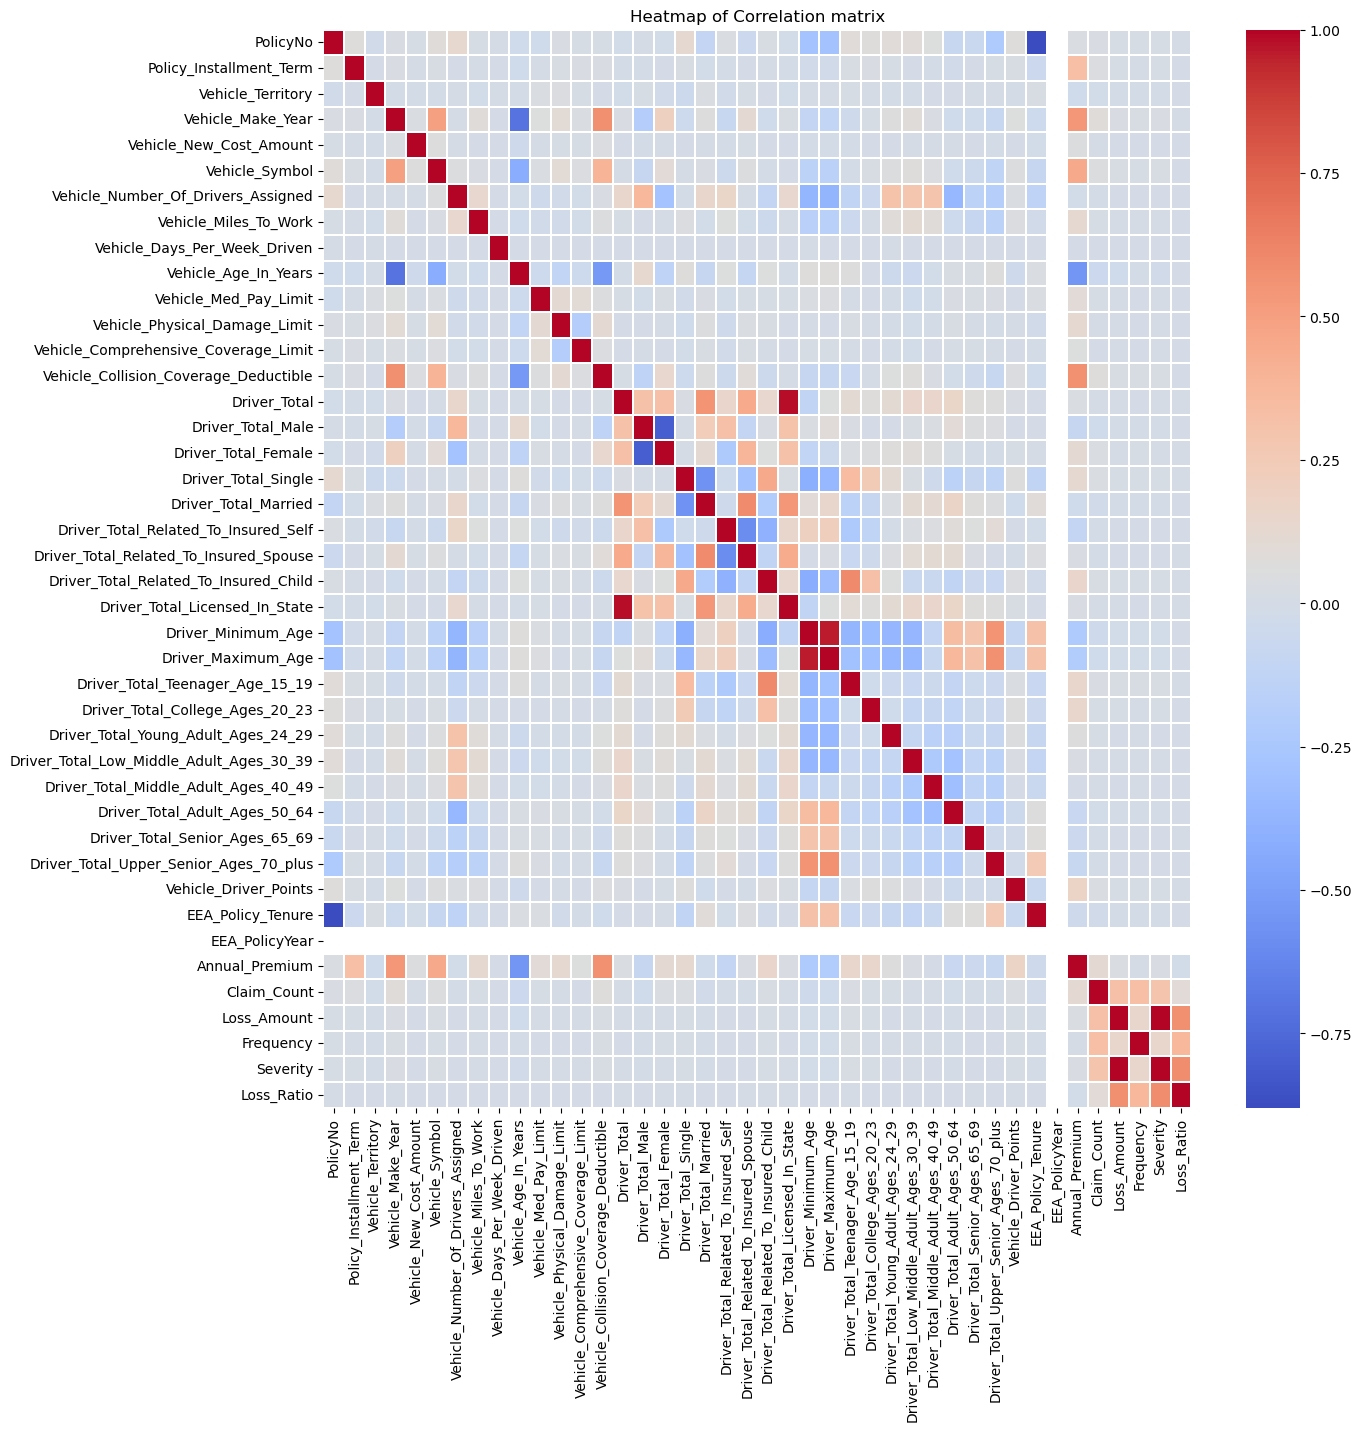

In [31]:
# Correlation matrix showing correlation coefficients between variables.

fig, axi = plt.subplots(figsize = (14, 14) ) 
plt.title('Heatmap of Correlation matrix') 
sns.heatmap(df.corr(),ax = axi,cmap="coolwarm", linewidths = 0.1)

In [32]:
# Create a correlation matrix of the numeric features
corr_matrix = df_num.corr()['Loss_Ratio'][:-1]

# Find the columns that have high correlation with Loss_Ratio
high_corr_cols = corr_matrix[abs(corr_matrix) > 0.5].index.tolist()

print("The highly correlated columns with Loss_Ratio:",high_corr_cols)

The highly correlated columns with Loss_Ratio: ['Loss_Amount', 'Severity']


# The highly correlated columns with Loss_Ratio: ['Loss_Amount', 'Severity']

In [34]:
# Checking the corelation between Loss_Ratio which is the target and Highly corerelated columns
corr_severity = df['Severity'].corr(df['Loss_Ratio'])
corr_loss_amount = df['Loss_Amount'].corr(df['Loss_Ratio'])

print("Correlation between severity and loss ratio:", corr_severity)
print("Correlation between loss amount and loss ratio:", corr_loss_amount)

Correlation between severity and loss ratio: 0.585348331547702
Correlation between loss amount and loss ratio: 0.5785322284803398


In [36]:
#print the correlation coefficients in descending order
corr_matrix_Loss_Ratio= abs(df.corr()['Loss_Ratio'])
corr_matrix_Loss_Ratio_sorted = corr_matrix_Loss_Ratio.sort_values(ascending=False)
print(corr_matrix_Loss_Ratio_sorted)

Loss_Ratio                                  1.000000
Severity                                    0.585348
Loss_Amount                                 0.578532
Frequency                                   0.371274
Claim_Count                                 0.092929
Annual_Premium                              0.013340
Driver_Total_Senior_Ages_65_69              0.008471
Driver_Total                                0.005764
Driver_Total_Licensed_In_State              0.005730
Driver_Total_Teenager_Age_15_19             0.005323
Driver_Total_Related_To_Insured_Child       0.003962
Driver_Total_Female                         0.003845
Vehicle_Territory                           0.003306
PolicyNo                                    0.003051
EEA_Policy_Tenure                           0.002588
Vehicle_Number_Of_Drivers_Assigned          0.002467
Driver_Total_Adult_Ages_50_64               0.002350
Driver_Total_Single                         0.002346
Vehicle_Make_Year                           0.

<AxesSubplot:>

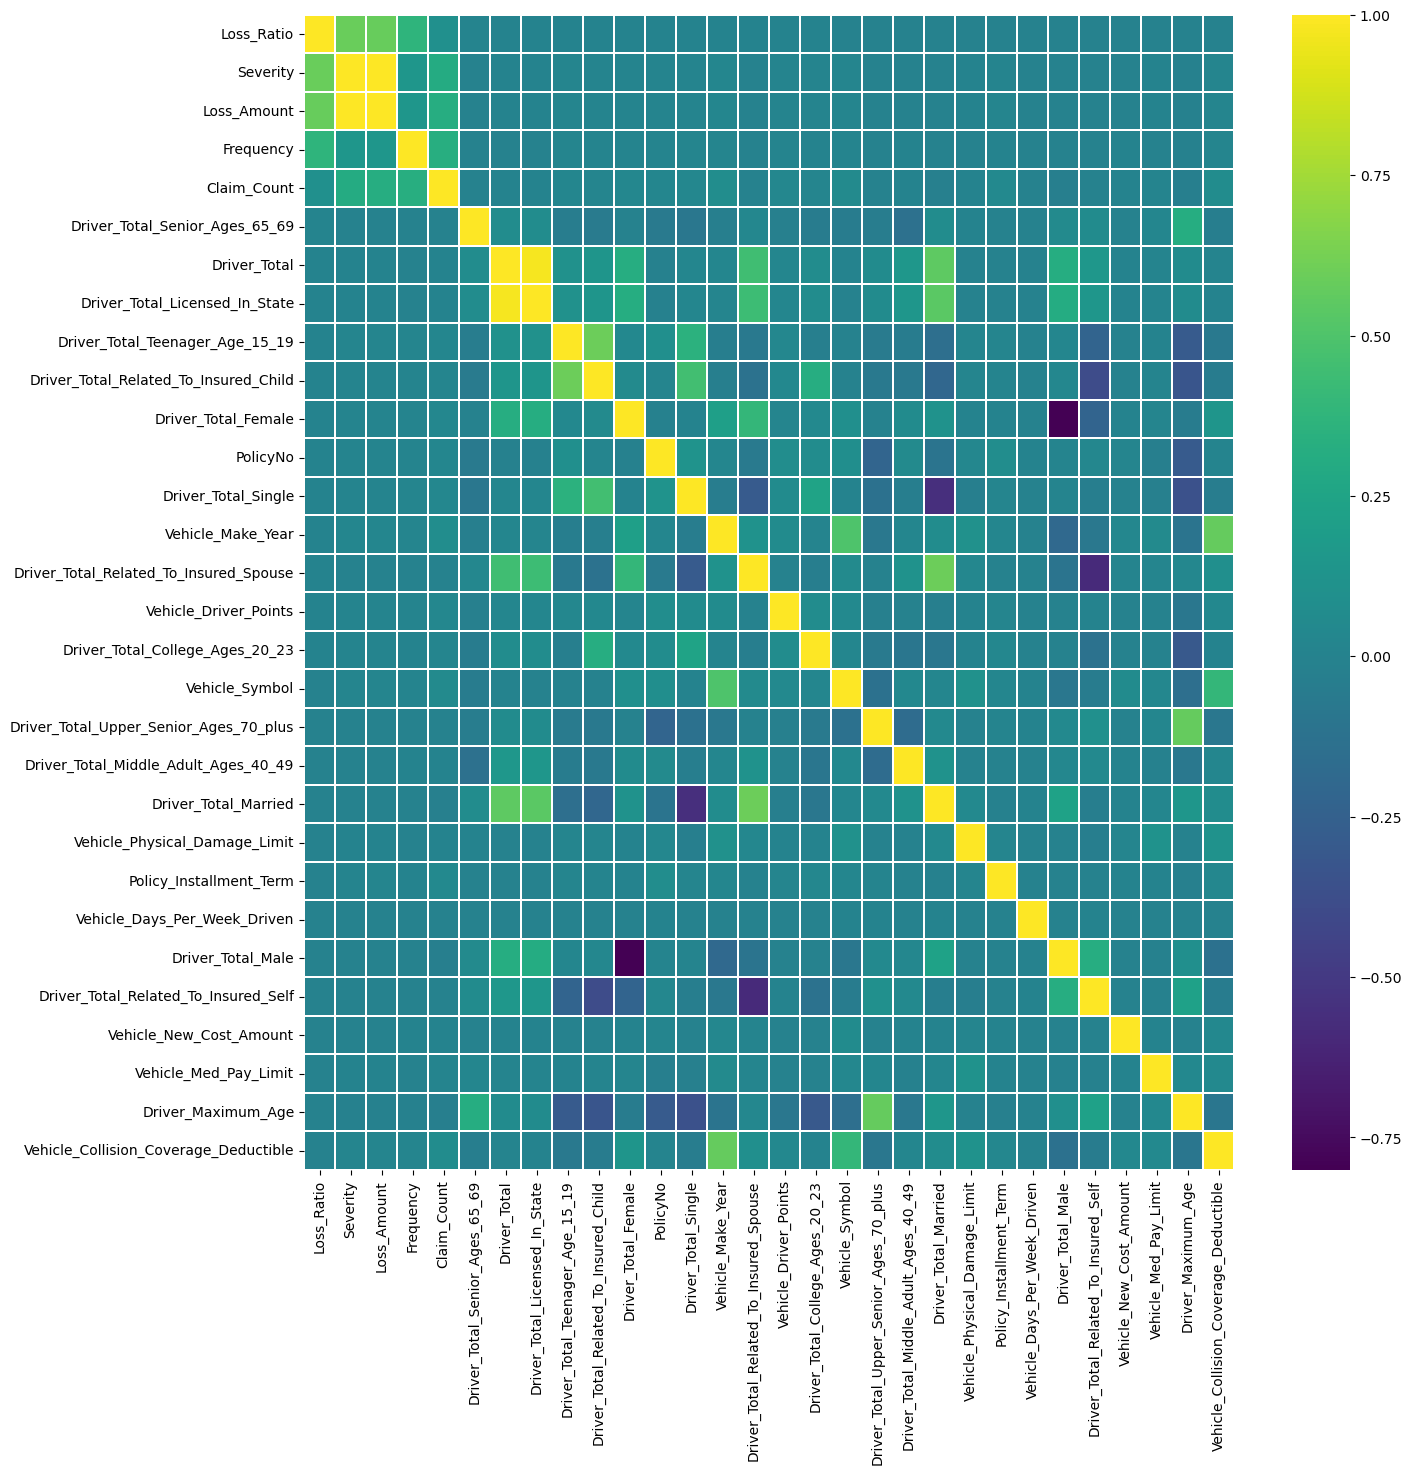

In [39]:
#The top 30 correlated features with the Loss_Ratio which is the target
y_t = df.corr().nlargest(30, 'Loss_Ratio')['Loss_Ratio'].index
fig, axi = plt.subplots(figsize =(15, 15)) 
sns.heatmap(np.corrcoef(df[y_t].values.T), ax = axi, cmap="viridis", linewidths = 0.3, yticklabels = y_t.values,xticklabels = y_t.values) 

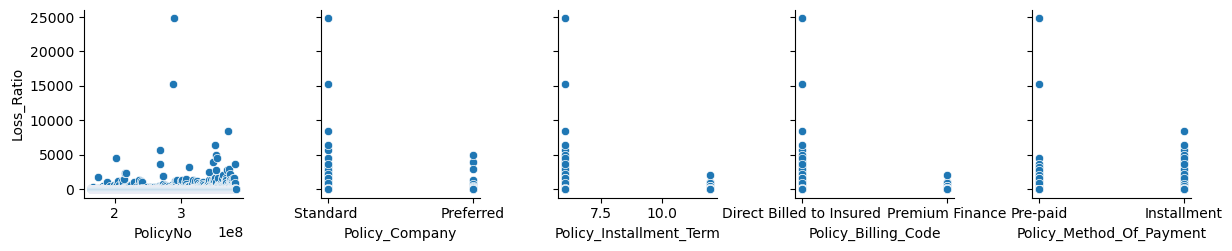

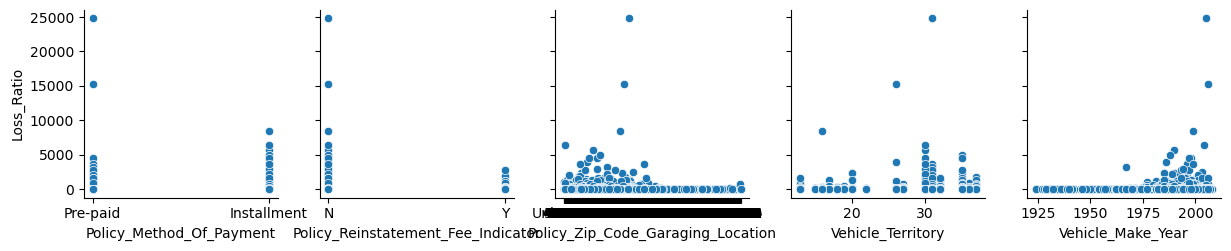

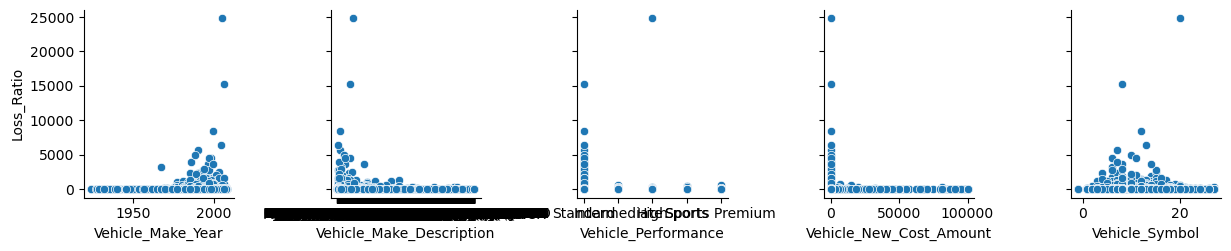

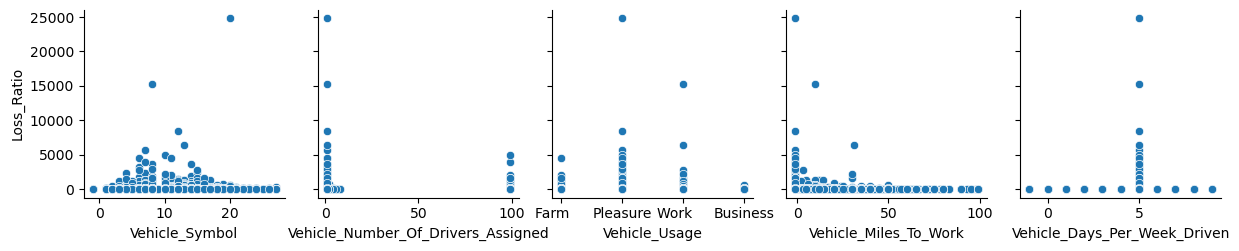

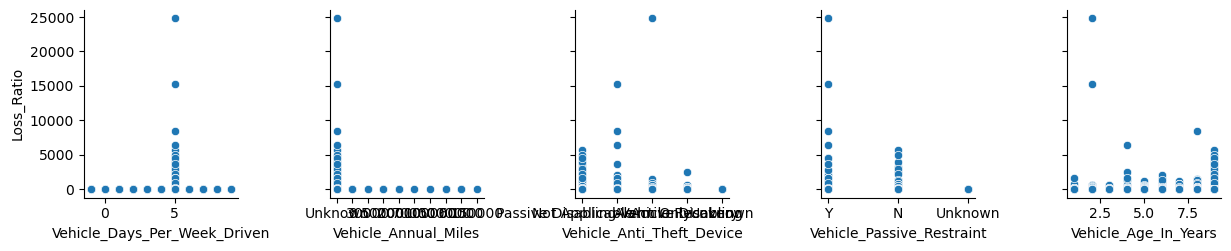

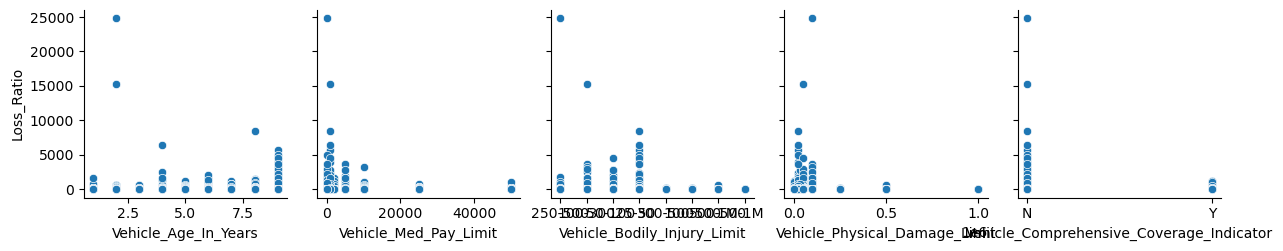

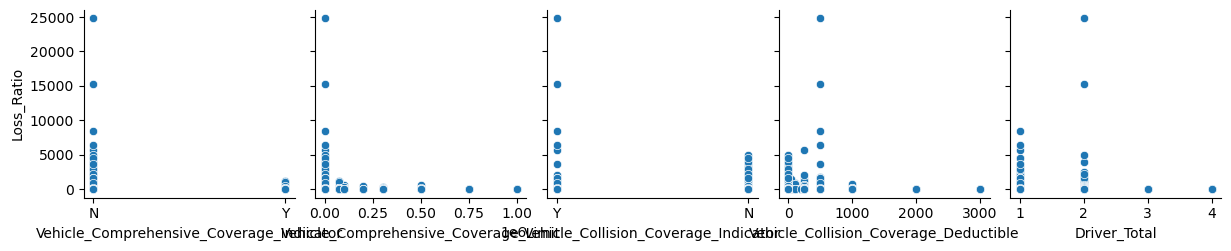

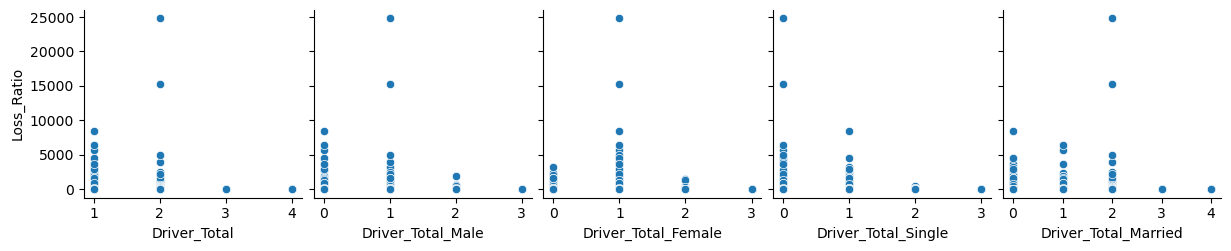

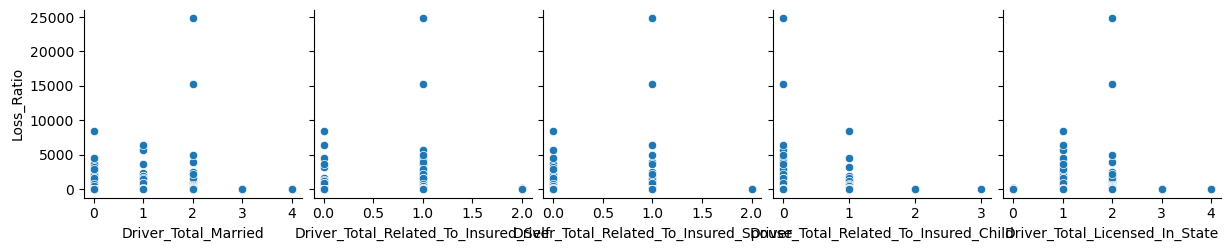

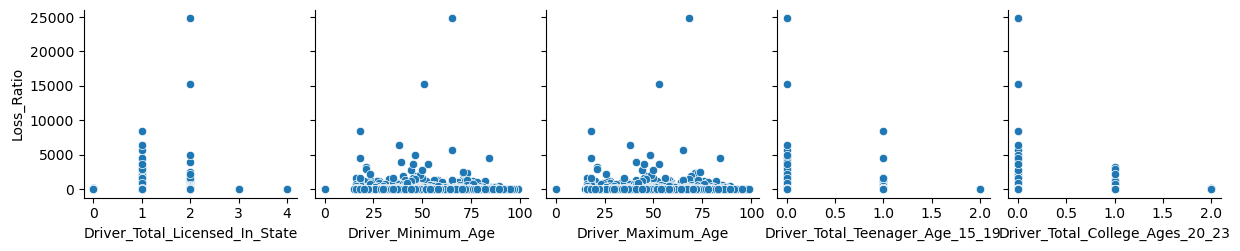

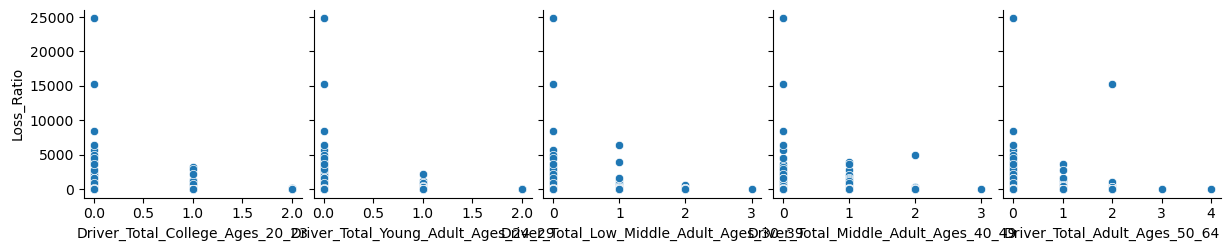

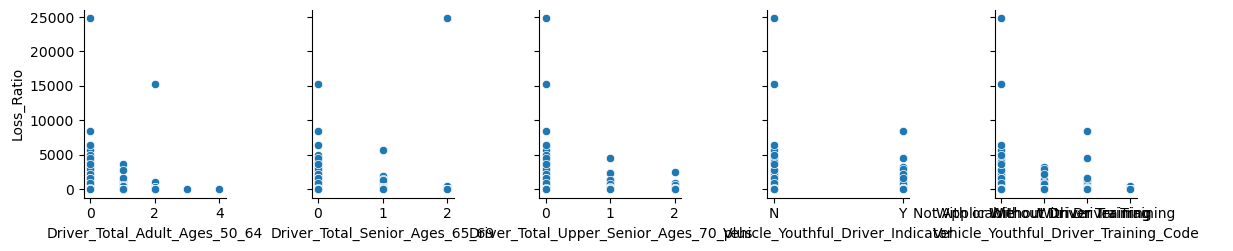

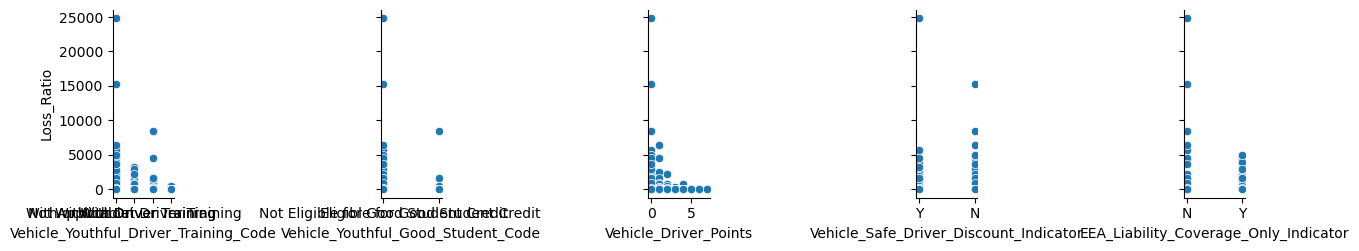

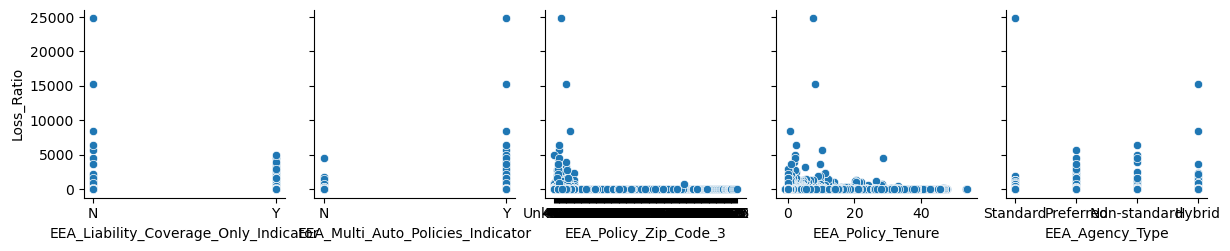

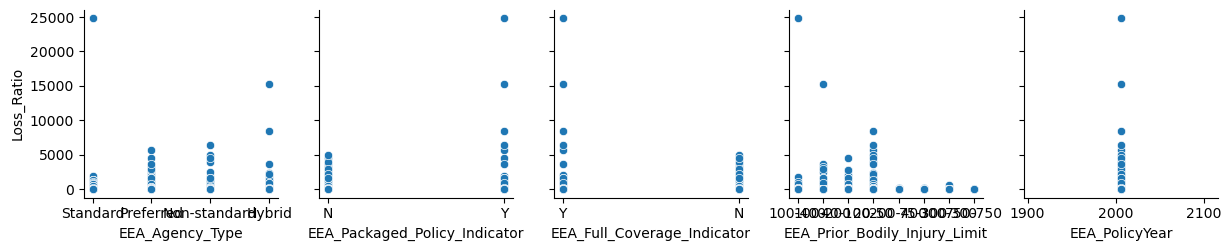

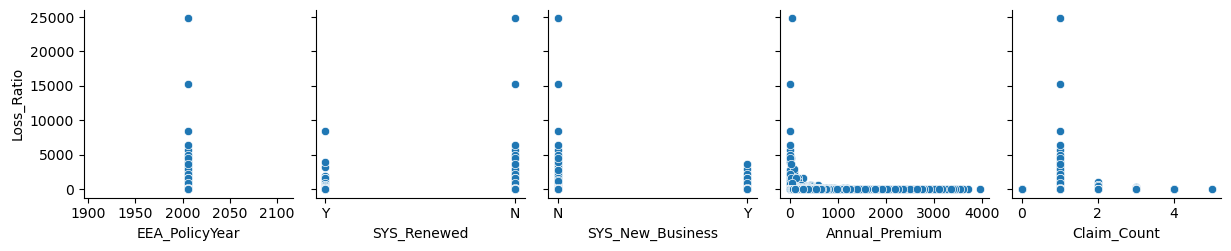

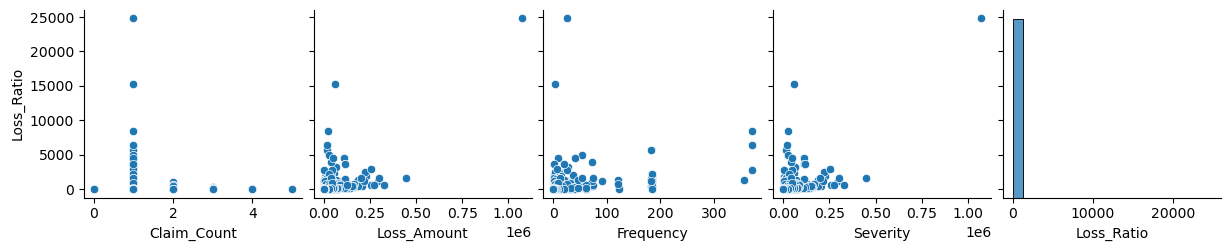

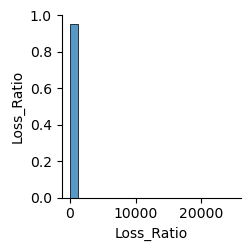

In [47]:
for i in range(0, len(df.columns), 4):
    sns.pairplot(data = df,
                x_vars = df.columns[i:i+5],
                y_vars = ['Loss_Ratio']);

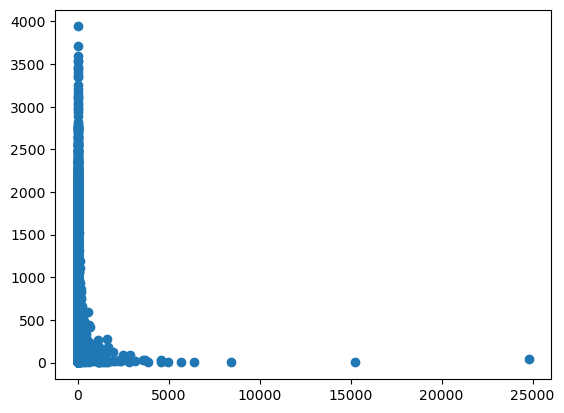

In [41]:
plt.scatter(df['Loss_Ratio'],df['Annual_Premium'])
plt.show()

<AxesSubplot:xlabel='Loss_Ratio', ylabel='Annual_Premium'>

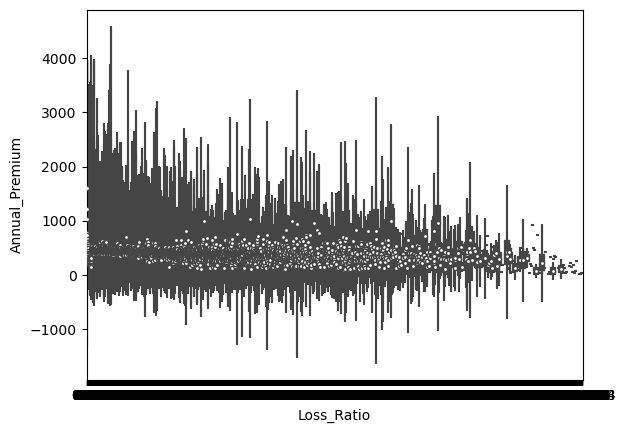

In [43]:
sns.violinplot(x = "Loss_Ratio", y="Annual_Premium", data=df)

<AxesSubplot:xlabel='Loss_Ratio', ylabel='Loss_Amount'>

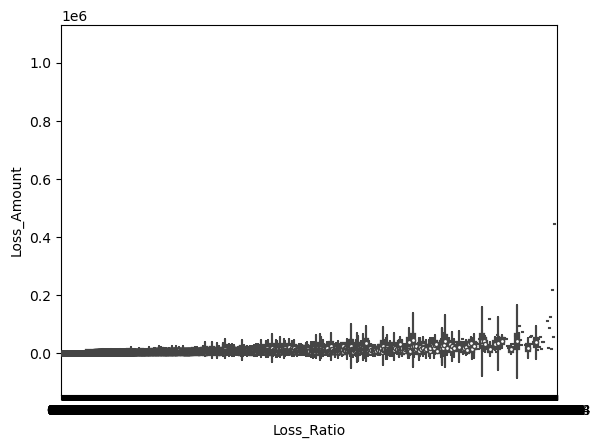

In [44]:
sns.violinplot(x = "Loss_Ratio", y="Loss_Amount", data=df)

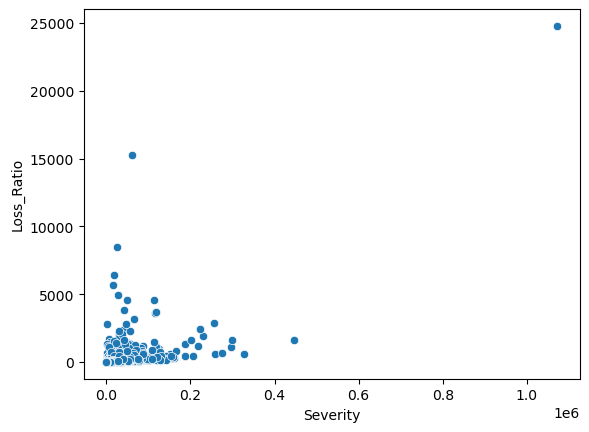

In [45]:
sns.scatterplot(data=df, x="Severity", y="Loss_Ratio");

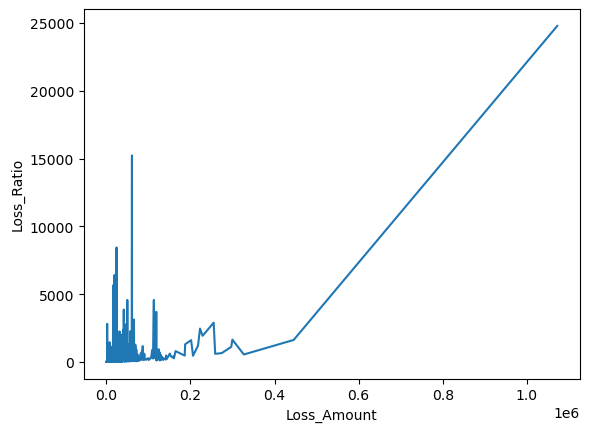

In [46]:
sns.lineplot(data=df, x="Loss_Amount", y="Loss_Ratio");

In [50]:
quantitative_features_list = ['Vehicle_Territory',
'Vehicle_Make_Year',
'Vehicle_Symbol',
'Vehicle_Number_Of_Drivers_Assigned',
'Vehicle_Age_In_Years',
'Driver_Total_Male',
'Driver_Total_Female',
'Driver_Total_Single',
'Driver_Total_Married',
'Driver_Minimum_Age',
'Driver_Maximum_Age',
'Vehicle_Youthful_Driver_Indicator',
'Annual_Premium']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Age_In_Years,Driver_Total_Male,Driver_Total_Female,Driver_Total_Single,Driver_Total_Married,Driver_Minimum_Age,Driver_Maximum_Age,Vehicle_Youthful_Driver_Indicator,Annual_Premium
0,35,2004,11,1,3,0,1,0,0,75,75,N,320.12
1,35,1980,11,1,9,0,1,0,1,71,71,N,259.70
2,17,2005,10,1,2,1,0,0,1,80,80,N,613.74
3,17,2005,12,1,2,1,0,0,1,74,74,N,541.66
4,17,2005,12,1,2,1,0,0,1,75,75,N,541.66


In [51]:
# Categorical Features
categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 26 non numerical features including:
['Policy_Company', 'Policy_Billing_Code', 'Policy_Method_Of_Payment', 'Policy_Reinstatement_Fee_Indicator', 'Policy_Zip_Code_Garaging_Location', 'Vehicle_Make_Description', 'Vehicle_Performance', 'Vehicle_Usage', 'Vehicle_Annual_Miles', 'Vehicle_Anti_Theft_Device', 'Vehicle_Passive_Restraint', 'Vehicle_Bodily_Injury_Limit', 'Vehicle_Comprehensive_Coverage_Indicator', 'Vehicle_Collision_Coverage_Indicator', 'Vehicle_Youthful_Driver_Training_Code', 'Vehicle_Youthful_Good_Student_Code', 'Vehicle_Safe_Driver_Discount_Indicator', 'EEA_Liability_Coverage_Only_Indicator', 'EEA_Multi_Auto_Policies_Indicator', 'EEA_Policy_Zip_Code_3', 'EEA_Agency_Type', 'EEA_Packaged_Policy_Indicator', 'EEA_Full_Coverage_Indicator', 'EEA_Prior_Bodily_Injury_Limit', 'SYS_Renewed', 'SYS_New_Business']


C:\Users\vishn\AppData\Local\Temp\ipykernel_21988\650302845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\vishn\AppData\Local\Temp\ipykernel_21988\650302845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\vishn\AppData\Local\Temp\ipykernel_21988\650302845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\vishn\AppData\Local\Temp\ipykernel_21988\650302845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\vishn\AppData\Local\Temp\ipykernel_21988\650302845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.g

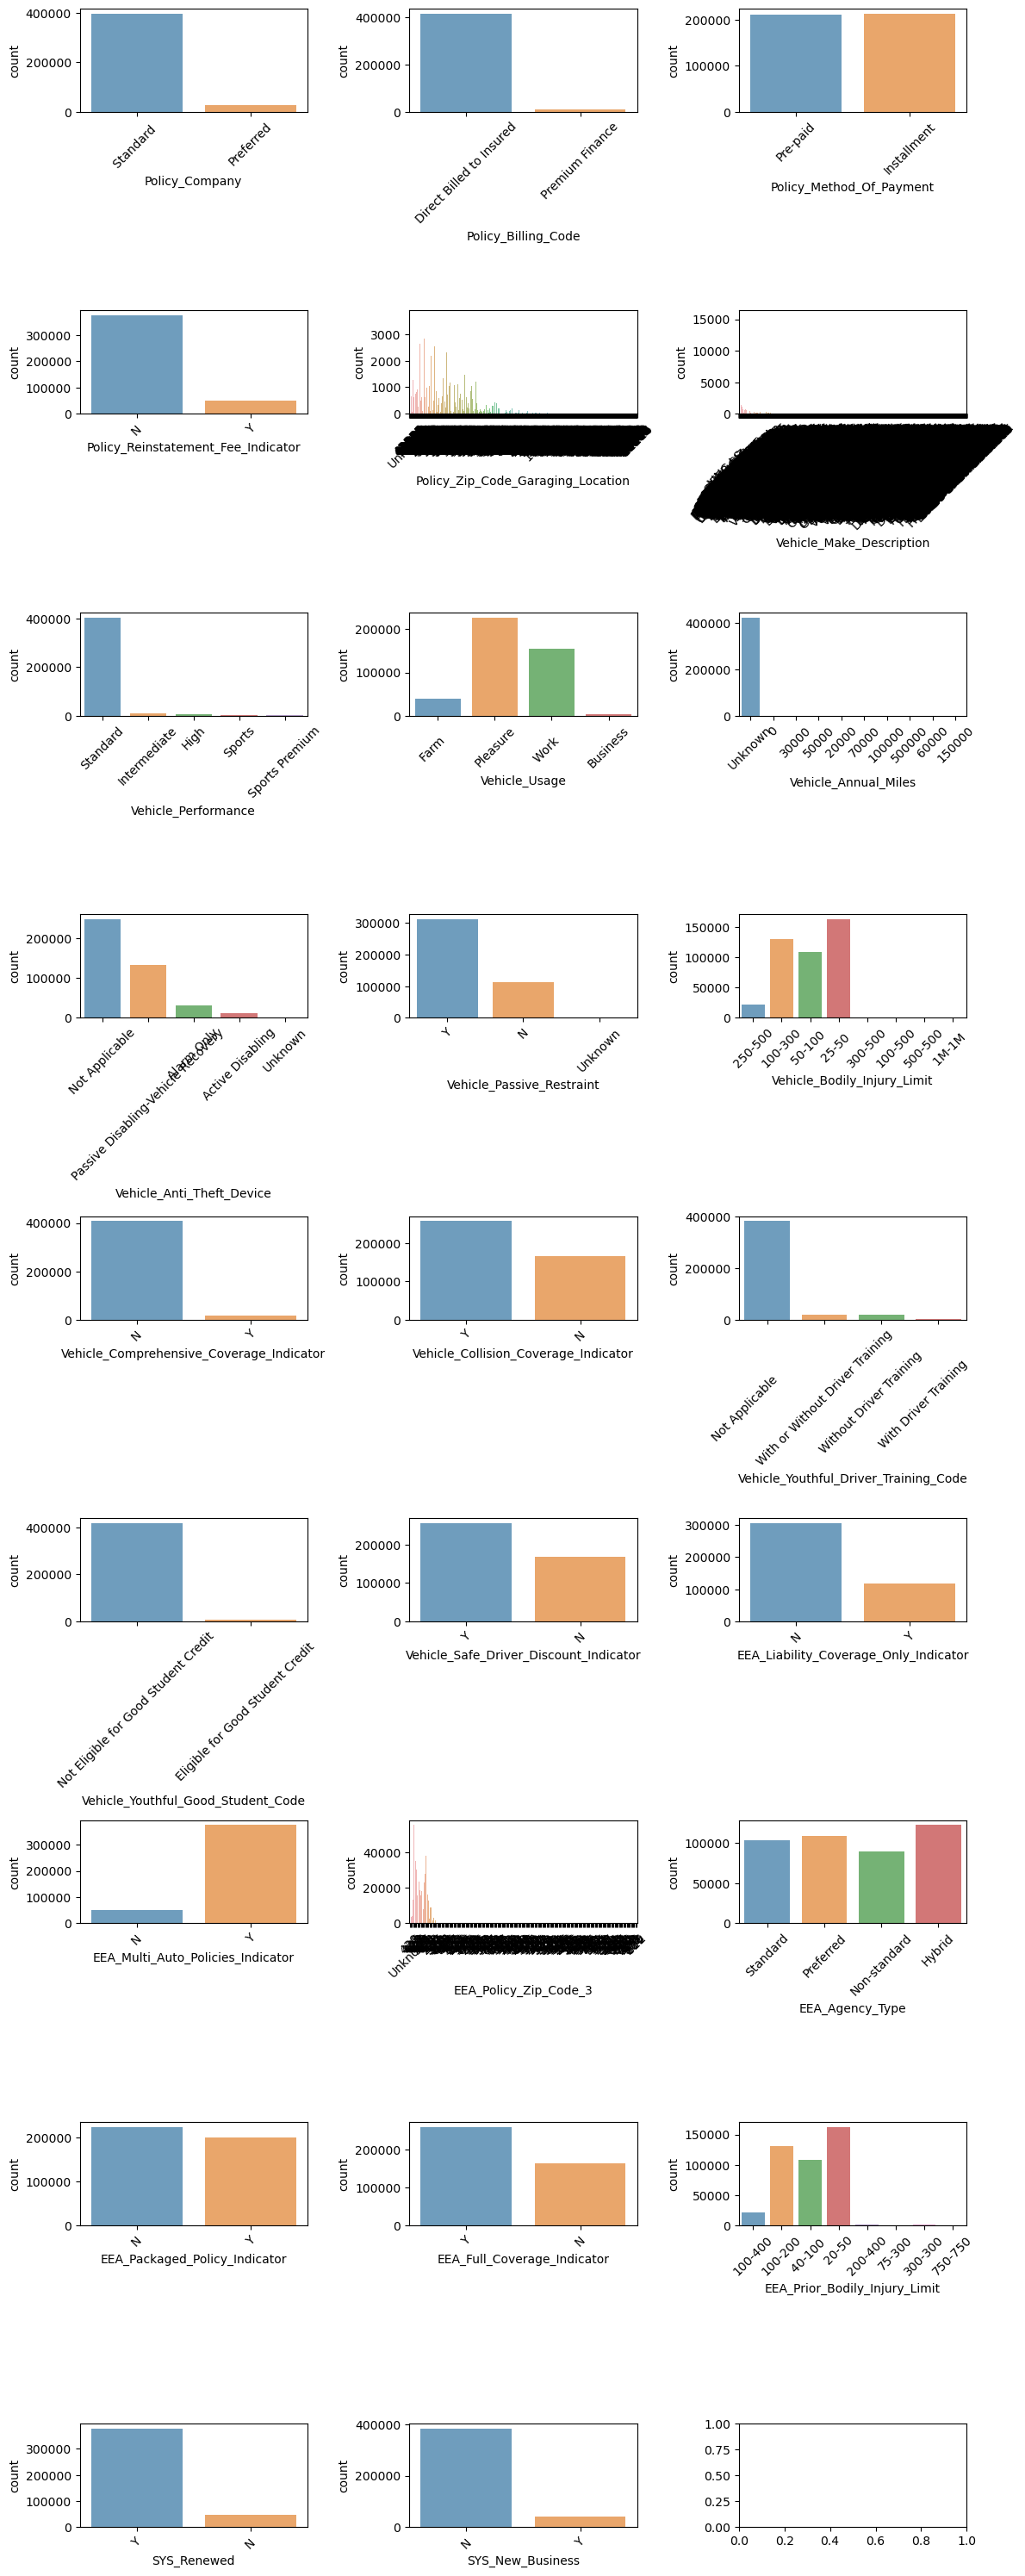

In [54]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()